### Note: This is a notebook for visualing predicted results
### The model is generated by attentionnet_rnn.py and the acc is above > 0.97


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import models
from torchsummary import summary
from torchvision.transforms.functional import resize
from torchvision import transforms
import torch.nn.functional as F
from torch.autograd import Variable
import h5py
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab import files
import pickle


In [0]:
drive.mount('./GoogleDrive/')
class_results_path = 'GoogleDrive/My Drive/Visual Attention Project/XinNet/6glimpse/class_result.pickle'
loc_results_path = 'GoogleDrive/My Drive/Visual Attention Project/XinNet/6glimpse/loc_results.pickle'
feat_results_path = 'GoogleDrive/My Drive/Visual Attention Project/XinNet/6glimpse/feat_result.pickle'
lab_results_path = 'GoogleDrive/My Drive/Visual Attention Project/XinNet/6glimpse/lab_result.pickle'
real_loc_results_path = 'GoogleDrive/My Drive/Visual Attention Project/XinNet/6glimpse/real_loc_result.pickle'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./GoogleDrive/


## loading test data

In [0]:
with open(class_results_path, 'rb') as handle:
    class_results = pickle.load(handle)

with open(loc_results_path, 'rb') as handle:
    loc_results = pickle.load(handle)

with open(feat_results_path, 'rb') as handle:
    feat_results = pickle.load(handle)

with open(lab_results_path, 'rb') as handle:
    lab_results = pickle.load(handle)

with open(real_loc_results_path, 'rb') as handle:
    real_loc_results = pickle.load(handle)

    
print('class_results shape', class_results.shape)
print('loc_results shape', loc_results.shape)
print('feat results shape', feat_results.shape)
print('label_results shape', lab_results.shape)
print('real loc results shape', real_loc_results.shape)

print('--------------------------------------------')
class_results = class_results.reshape(78,6,128,10)
loc_results = loc_results.reshape(78,6,128,6)
print('class_results shape', class_results.shape)
print('loc_results shape', loc_results.shape)
print('--------------------------------------------')


class_results_1_batch = class_results[0,:,:,:]
loc_1_batch = loc_results[0,:,:,:]
feat_batch_1 = feat_results[0:128,:,:,:]
label_batch_1 = lab_results[0:128]
real_loc_batch_1 = real_loc_results[0:128,:]
print('--------------------------------------------')


print('sample class results', class_results_1_batch.shape)
print('sample loc results', loc_1_batch.shape)
print('sample feat results', feat_batch_1.shape)
print('sample label results', label_batch_1.shape)
print('sample real loc results', real_loc_batch_1.shape)


# Convert to Tensor
class_results_1_batch = torch.from_numpy(class_results_1_batch)
loc_1_batch = torch.from_numpy(loc_1_batch)
feat_batch_1 = torch.from_numpy(feat_batch_1)
label_batch_1 = torch.from_numpy(label_batch_1)
real_loc_batch_1 = torch.from_numpy(real_loc_batch_1)



class_results shape (468, 128, 10)
loc_results shape (468, 128, 6)
feat results shape (9984, 100, 100, 1)
label_results shape (9984,)
real loc results shape (9984, 6)
--------------------------------------------
class_results shape (78, 6, 128, 10)
loc_results shape (78, 6, 128, 6)
--------------------------------------------
--------------------------------------------
sample class results (6, 128, 10)
sample loc results (6, 128, 6)
sample feat results (128, 100, 100, 1)
sample label results (128,)
sample real loc results (128, 6)


## Visualization

In [0]:
def resize_tensor(input_tensors, h, w):
  final_output = None
  height, width = input_tensors.shape
  input_tensors = torch.squeeze(input_tensors, 1)
  img = input_tensors
  img_PIL = transforms.ToPILImage()(img)
  img_PIL = torchvision.transforms.Resize([h,w])(img_PIL)
  img_PIL = torchvision.transforms.ToTensor()(img_PIL)
  return img_PIL


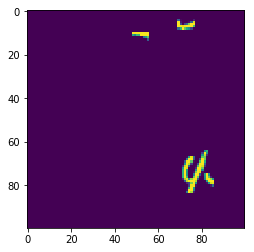

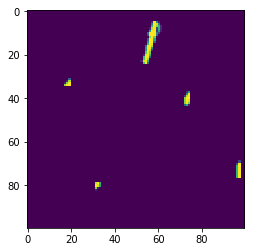

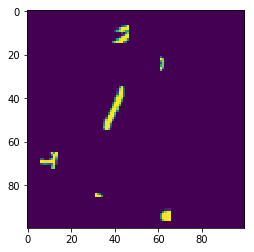

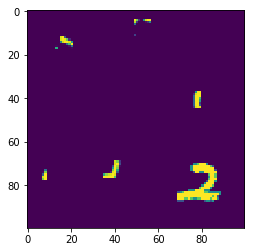

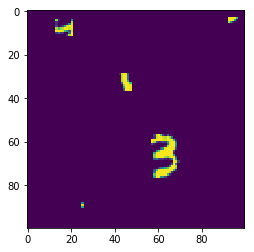

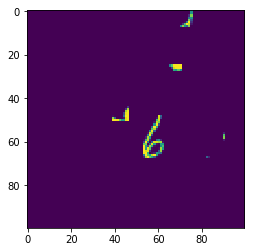

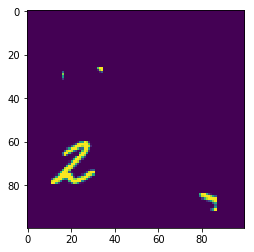

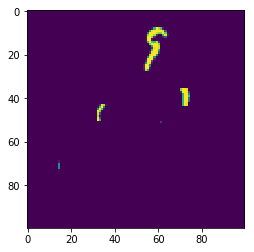

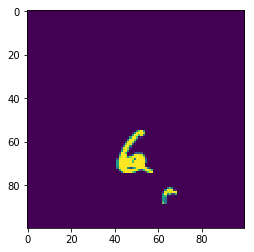

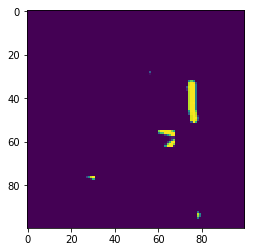

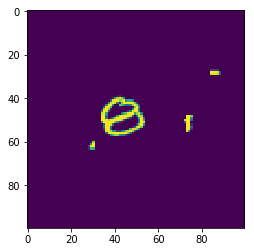

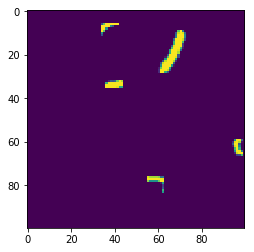

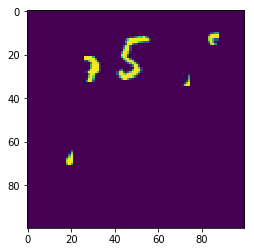

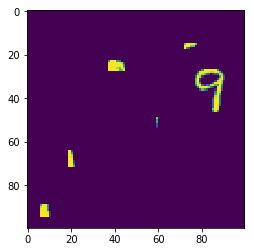

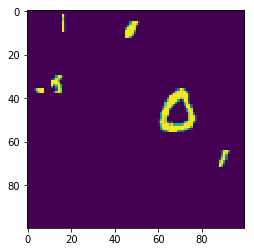

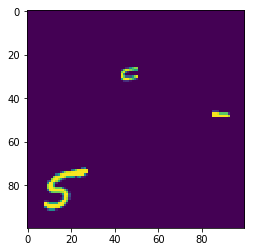

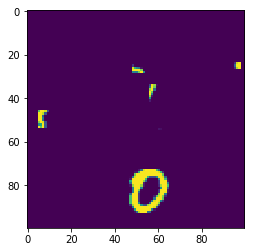

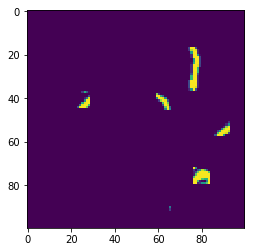

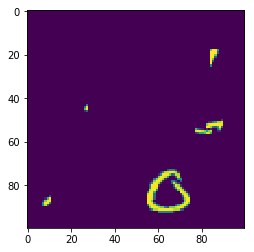

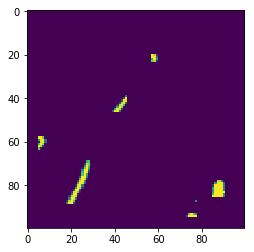

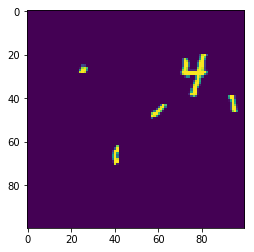

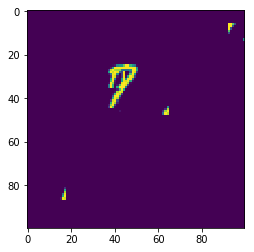

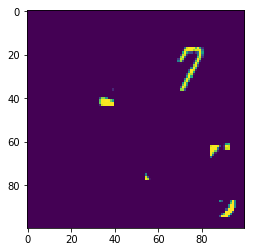

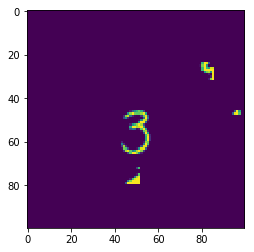

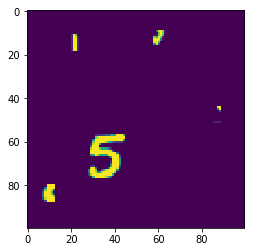

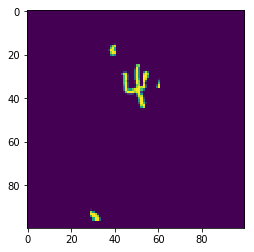

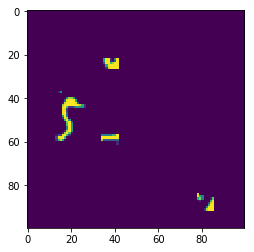

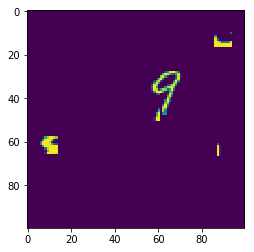

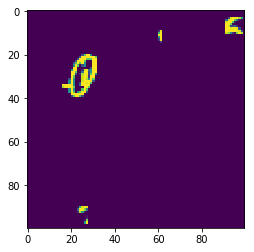

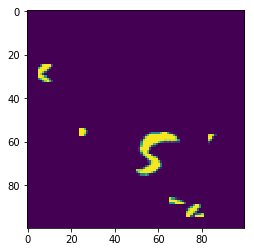

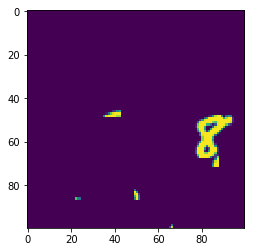

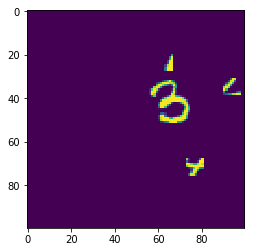

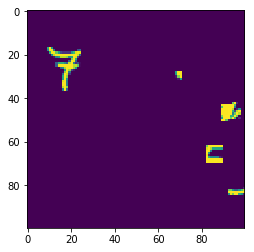

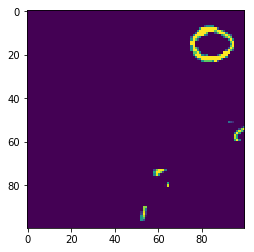

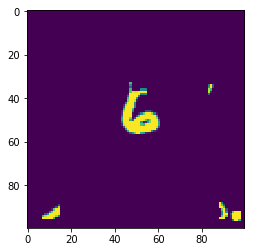

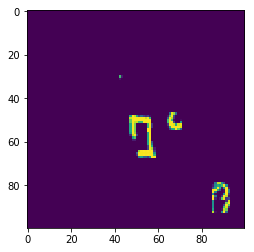

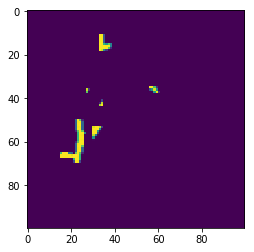

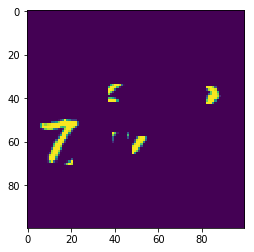

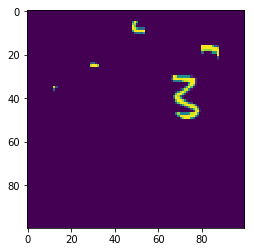

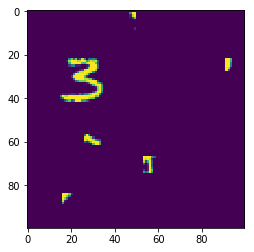

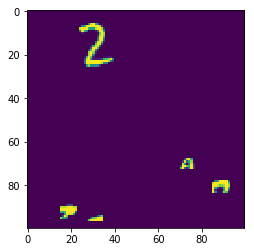

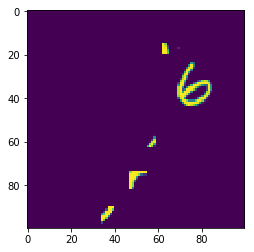

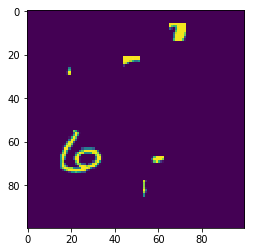

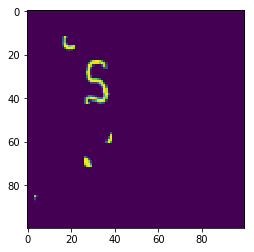

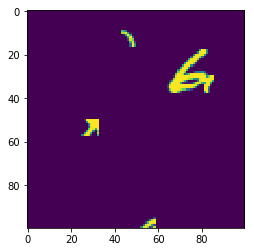

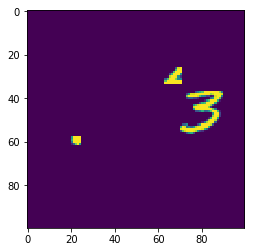

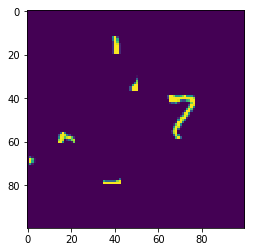

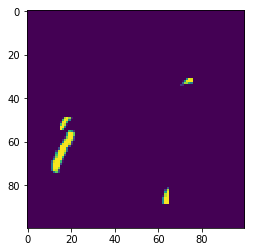

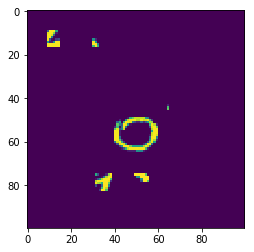

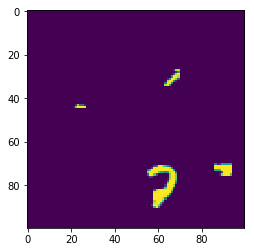

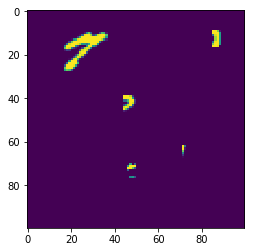

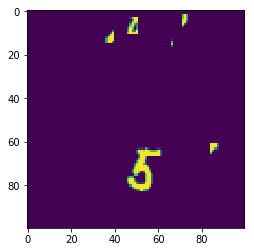

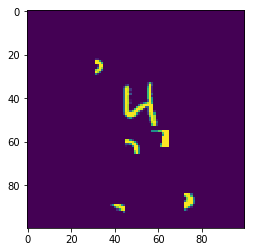

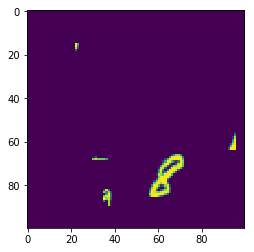

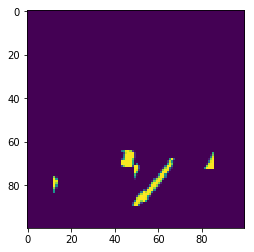

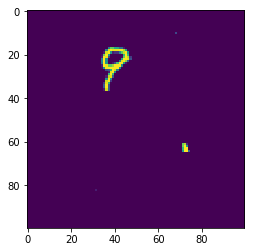

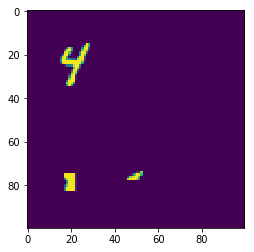

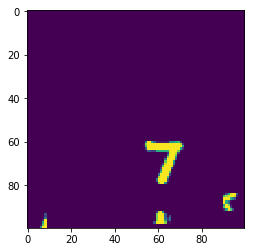

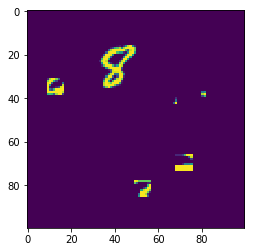

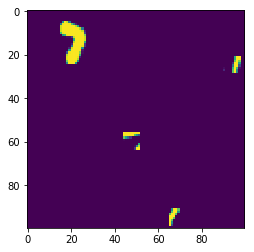

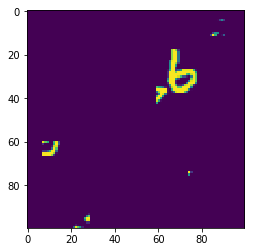

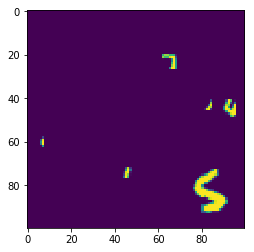

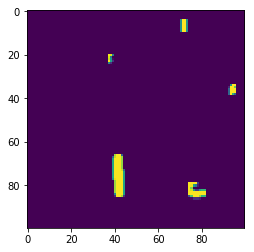

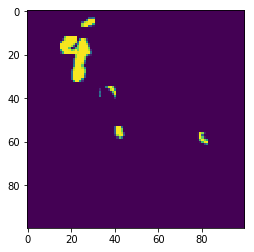

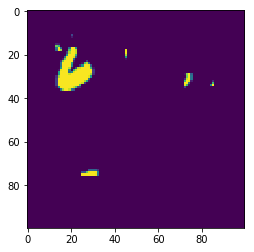

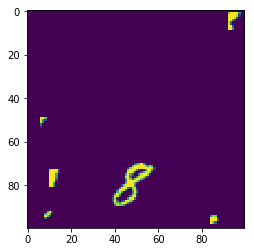

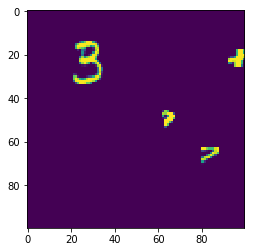

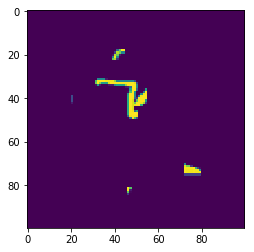

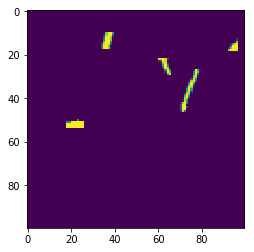

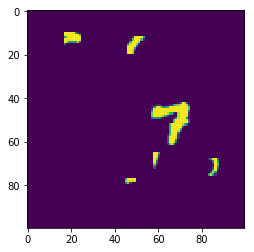

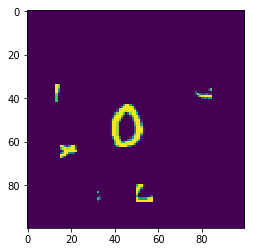

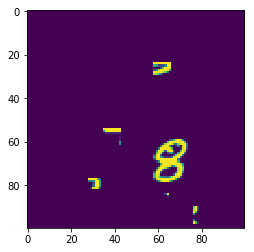

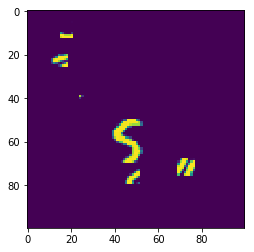

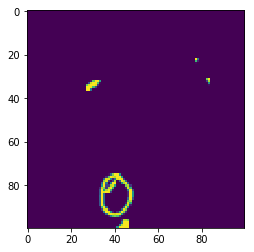

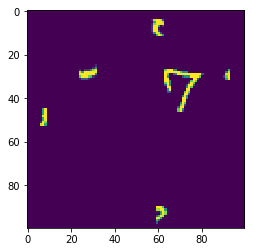

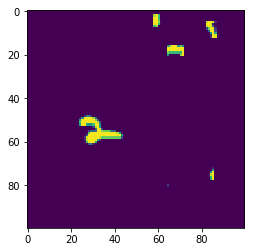

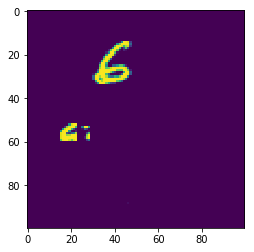

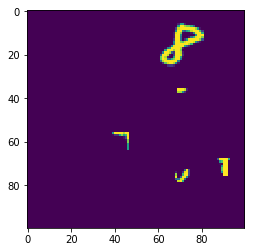

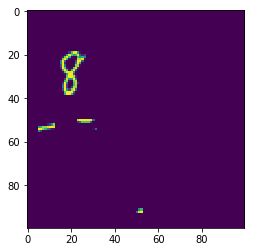

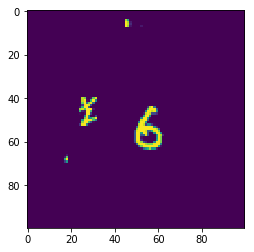

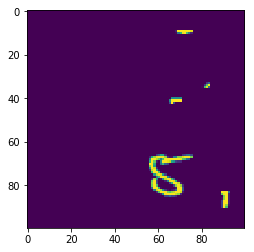

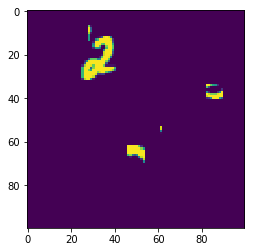

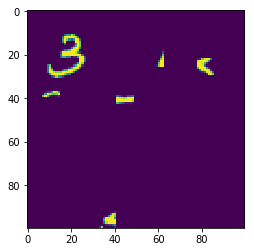

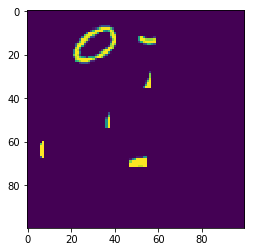

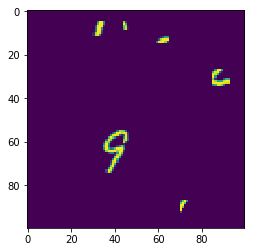

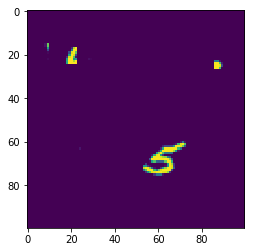

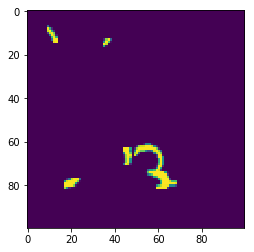

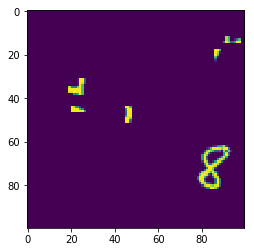

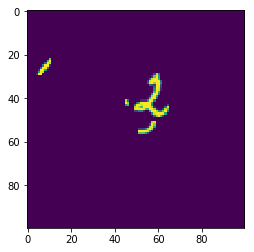

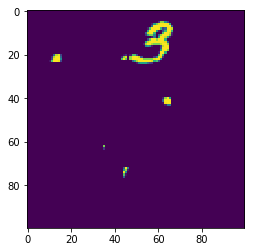

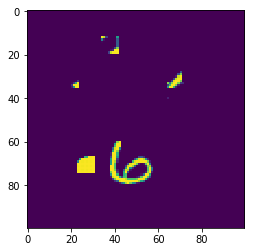

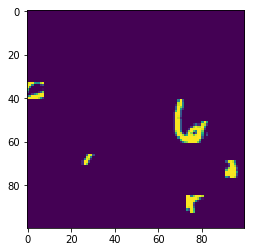

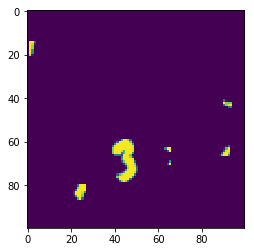

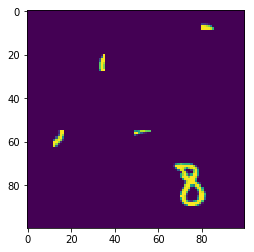

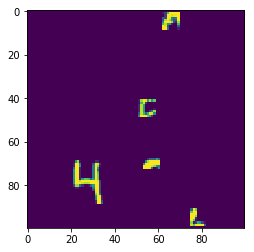

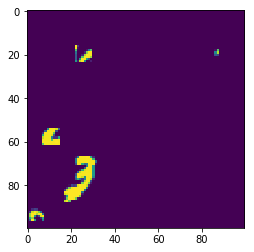

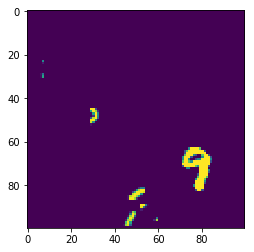

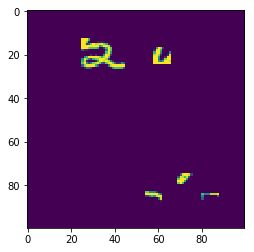

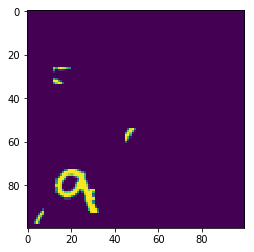

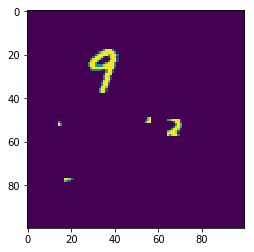

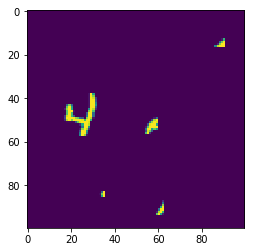

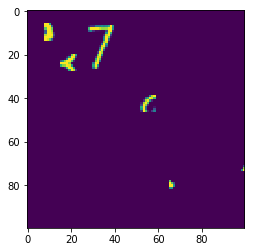

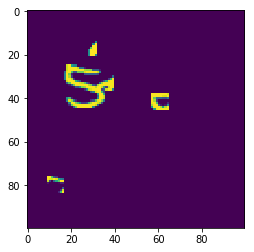

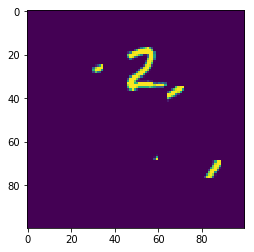

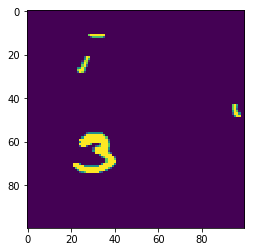

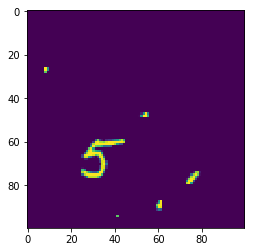

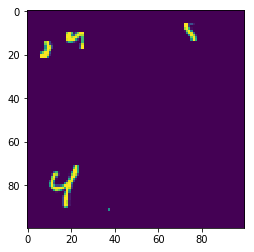

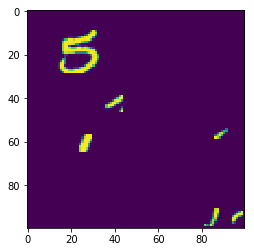

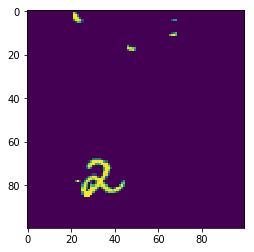

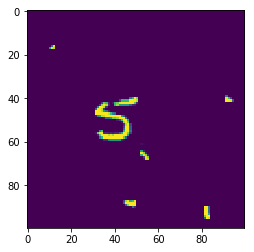

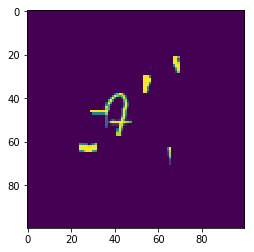

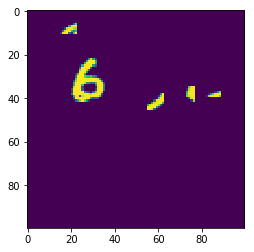

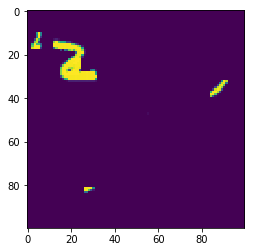

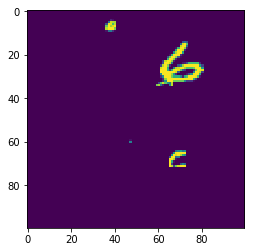

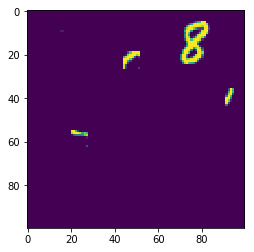

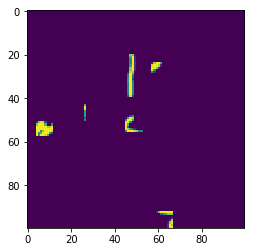

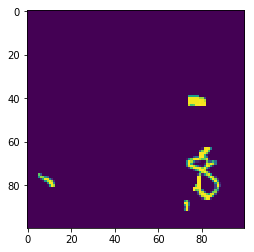

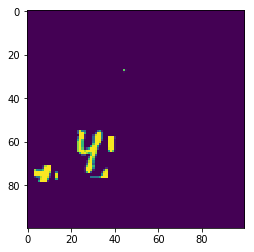

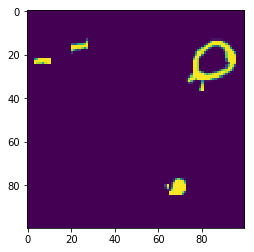

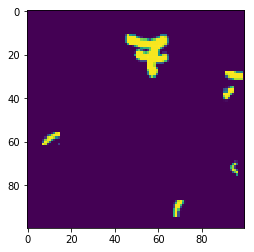

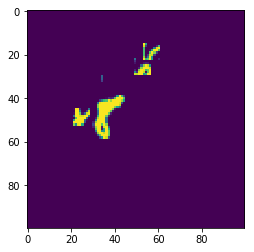

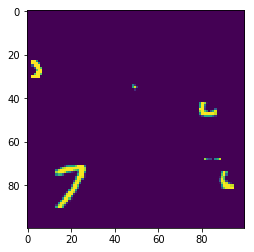

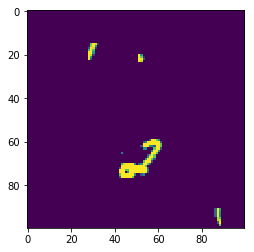

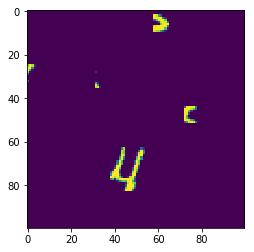

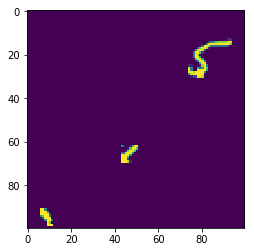

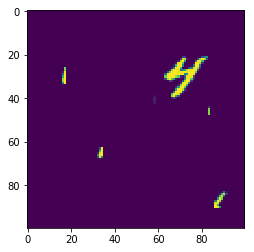

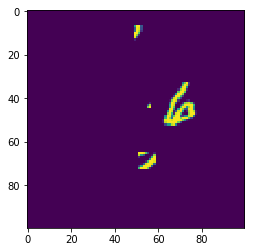

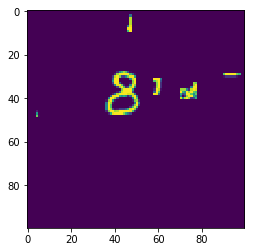

In [0]:
h = 26
w = 26
locations = real_loc_batch_1.view(-1,2,3)
all_grid = F.affine_grid(locations, [128,1,h,w])
all_output_pic = F.grid_sample(feat_batch_1.view(128,1,100,100), all_grid)
for idx_img in range(128):
  real_img = torch.squeeze(feat_batch_1[idx_img],2)
  plt.imshow(real_img)
  plt.show()

current loc_glimpse:  tensor([ 0.3540, -0.0261,  0.6642, -0.0078,  0.3865,  0.4805])
current loc_glimpse:  tensor([ 0.3711, -0.0244,  0.5506, -0.0252,  0.3917,  0.4085])
current loc_glimpse:  tensor([ 0.3877, -0.0244,  0.5270, -0.0264,  0.4063,  0.3846])
current loc_glimpse:  tensor([ 0.4011, -0.0245,  0.5084, -0.0275,  0.4179,  0.3636])
current loc_glimpse:  tensor([ 0.4135, -0.0245,  0.4911, -0.0283,  0.4288,  0.3431])
current loc_glimpse:  tensor([ 0.4246, -0.0246,  0.4746, -0.0289,  0.4386,  0.3216])


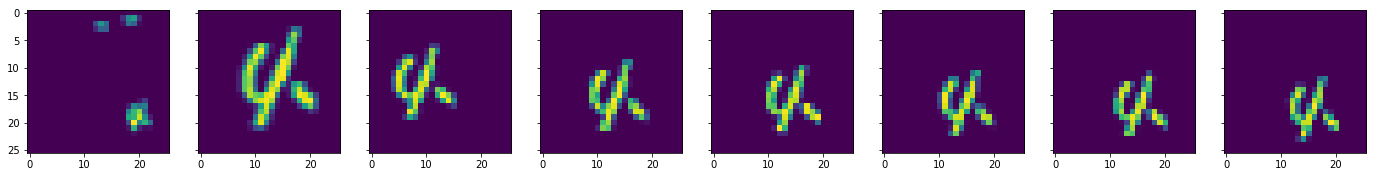

current loc_glimpse:  tensor([ 0.4539, -0.0252, -0.1167, -0.0226,  0.4629, -0.5766])
current loc_glimpse:  tensor([ 0.5380, -0.0256, -0.0471, -0.0290,  0.5396, -0.3603])
current loc_glimpse:  tensor([ 0.5200, -0.0253, -0.0300, -0.0299,  0.5231, -0.3471])
current loc_glimpse:  tensor([ 0.5071, -0.0252, -0.0102, -0.0301,  0.5116, -0.3309])
current loc_glimpse:  tensor([ 0.4964, -0.0251,  0.0102, -0.0302,  0.5018, -0.3103])
current loc_glimpse:  tensor([ 0.4882, -0.0250,  0.0294, -0.0303,  0.4942, -0.2891])


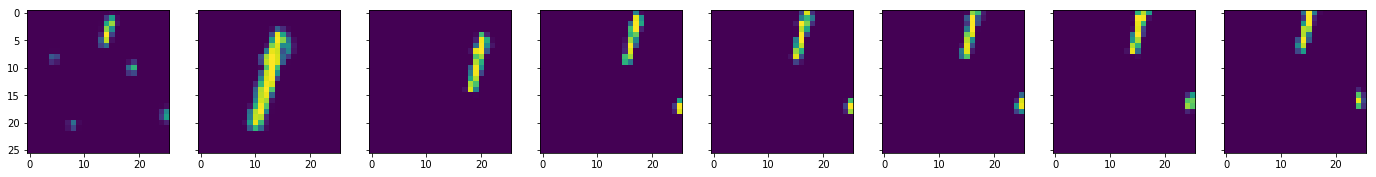

current loc_glimpse:  tensor([ 0.4721, -0.0214, -0.3882, -0.0374,  0.4780, -0.0414])
current loc_glimpse:  tensor([ 0.4595, -0.0223, -0.2338, -0.0347,  0.4646, -0.1252])
current loc_glimpse:  tensor([ 0.4581, -0.0224, -0.2095, -0.0345,  0.4635, -0.1159])
current loc_glimpse:  tensor([ 0.4585, -0.0225, -0.1868, -0.0343,  0.4641, -0.1059])
current loc_glimpse:  tensor([ 0.4597, -0.0226, -0.1653, -0.0342,  0.4653, -0.0964])
current loc_glimpse:  tensor([ 0.4609, -0.0228, -0.1450, -0.0340,  0.4666, -0.0875])


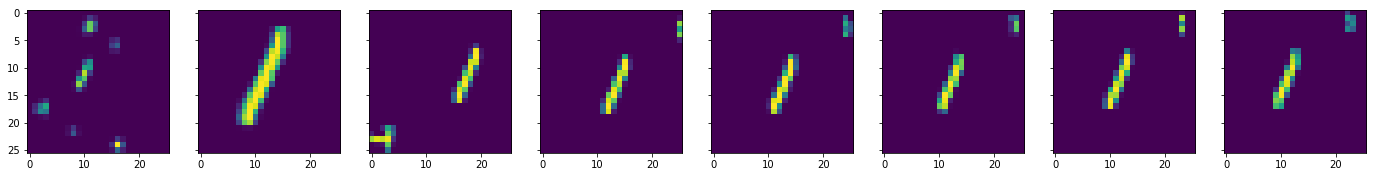

current loc_glimpse:  tensor([ 0.3071, -0.0269,  0.7376,  0.0017,  0.3481,  0.6007])
current loc_glimpse:  tensor([ 0.3409, -0.0242,  0.5890, -0.0224,  0.3654,  0.4697])
current loc_glimpse:  tensor([ 0.3617, -0.0243,  0.5596, -0.0240,  0.3835,  0.4388])
current loc_glimpse:  tensor([ 0.3777, -0.0243,  0.5370, -0.0253,  0.3975,  0.4127])
current loc_glimpse:  tensor([ 0.3927, -0.0244,  0.5166, -0.0265,  0.4106,  0.3886])
current loc_glimpse:  tensor([ 0.4065, -0.0245,  0.4980, -0.0275,  0.4227,  0.3665])


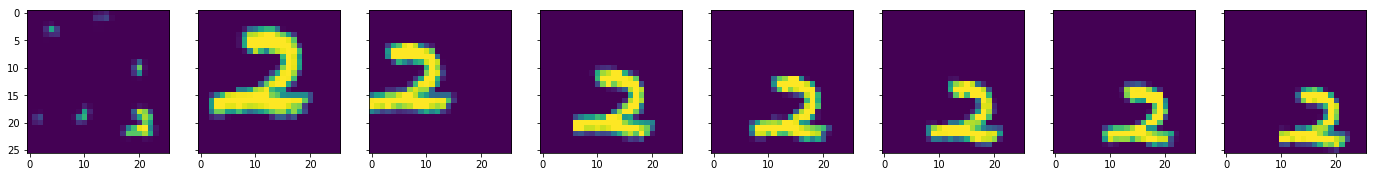

current loc_glimpse:  tensor([ 0.4632, -0.0246,  0.2975, -0.0269,  0.4733,  0.1479])
current loc_glimpse:  tensor([ 0.3828, -0.0240,  0.4173, -0.0311,  0.3985,  0.3233])
current loc_glimpse:  tensor([ 0.4027, -0.0242,  0.3985, -0.0312,  0.4168,  0.3037])
current loc_glimpse:  tensor([ 0.4187, -0.0244,  0.3817, -0.0314,  0.4314,  0.2837])
current loc_glimpse:  tensor([ 0.4315, -0.0246,  0.3660, -0.0316,  0.4431,  0.2646])
current loc_glimpse:  tensor([ 0.4407, -0.0247,  0.3506, -0.0316,  0.4515,  0.2456])


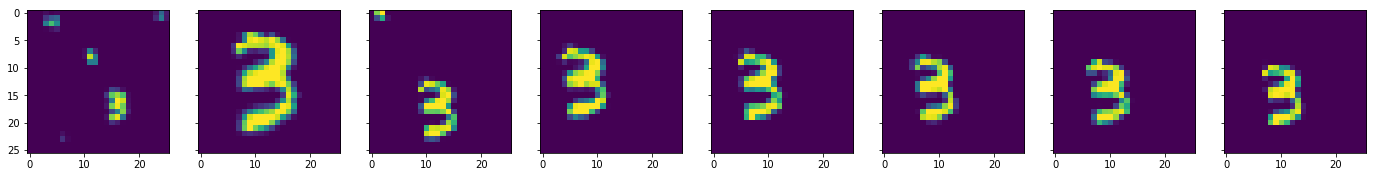

current loc_glimpse:  tensor([ 0.4684, -0.0235,  0.0329, -0.0376,  0.4742,  0.0713])
current loc_glimpse:  tensor([ 0.4526, -0.0238,  0.1369, -0.0329,  0.4609,  0.1219])
current loc_glimpse:  tensor([ 0.4528, -0.0238,  0.1362, -0.0328,  0.4611,  0.1143])
current loc_glimpse:  tensor([ 0.4543, -0.0239,  0.1358, -0.0327,  0.4625,  0.1067])
current loc_glimpse:  tensor([ 0.4561, -0.0239,  0.1356, -0.0327,  0.4643,  0.0995])
current loc_glimpse:  tensor([ 0.4579, -0.0240,  0.1356, -0.0326,  0.4659,  0.0928])


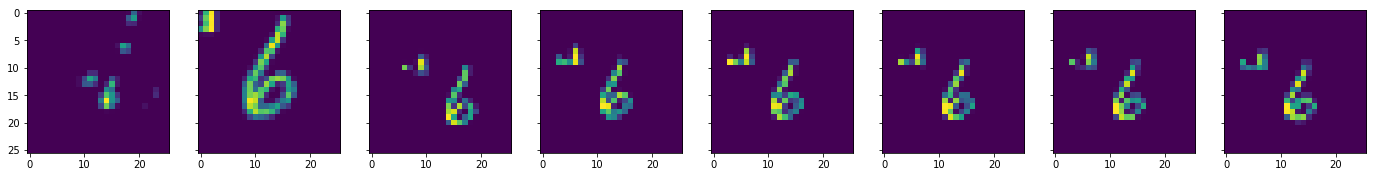

current loc_glimpse:  tensor([ 0.3484, -0.0162, -0.6178, -0.0569,  0.3622,  0.4292])
current loc_glimpse:  tensor([ 0.4344, -0.0189, -0.3979, -0.0455,  0.4378,  0.2478])
current loc_glimpse:  tensor([ 0.4369, -0.0192, -0.3881, -0.0443,  0.4404,  0.2352])
current loc_glimpse:  tensor([ 0.4384, -0.0195, -0.3782, -0.0432,  0.4422,  0.2274])
current loc_glimpse:  tensor([ 0.4410, -0.0197, -0.3667, -0.0424,  0.4448,  0.2196])
current loc_glimpse:  tensor([ 0.4449, -0.0199, -0.3551, -0.0414,  0.4487,  0.2105])


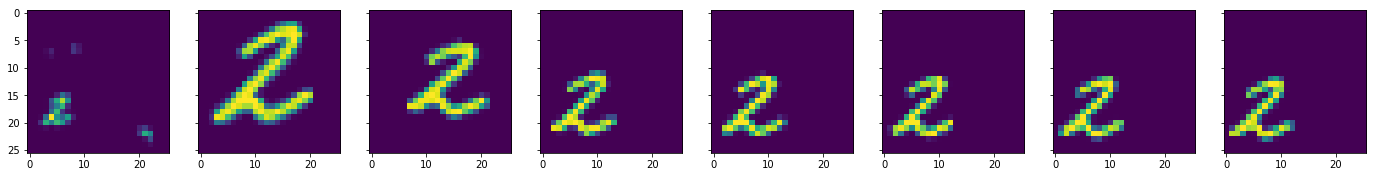

current loc_glimpse:  tensor([ 0.3727, -0.0254, -0.0029, -0.0208,  0.3855, -0.7415])
current loc_glimpse:  tensor([ 0.4646, -0.0252, -0.0120, -0.0274,  0.4710, -0.4673])
current loc_glimpse:  tensor([ 0.4627, -0.0252,  0.0071, -0.0281,  0.4696, -0.4416])
current loc_glimpse:  tensor([ 0.4628, -0.0252,  0.0270, -0.0288,  0.4700, -0.4179])
current loc_glimpse:  tensor([ 0.4641, -0.0252,  0.0475, -0.0290,  0.4716, -0.3931])
current loc_glimpse:  tensor([ 0.4659, -0.0254,  0.0676, -0.0289,  0.4739, -0.3683])


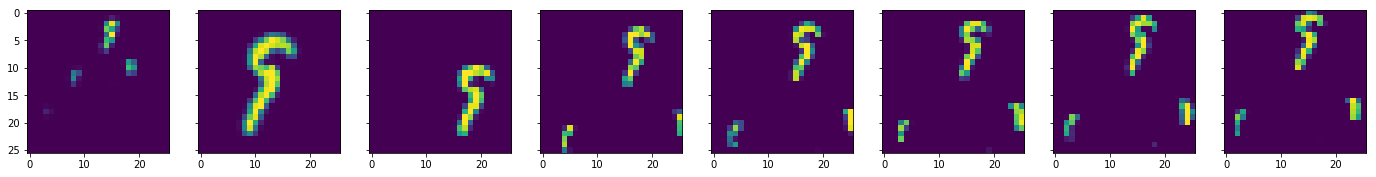

current loc_glimpse:  tensor([ 0.4820, -0.0223, -0.0244, -0.0357,  0.4866,  0.2761])
current loc_glimpse:  tensor([ 0.4125, -0.0225,  0.1045, -0.0347,  0.4230,  0.2978])
current loc_glimpse:  tensor([ 0.4237, -0.0227,  0.1007, -0.0345,  0.4335,  0.2787])
current loc_glimpse:  tensor([ 0.4331, -0.0228,  0.0966, -0.0344,  0.4421,  0.2606])
current loc_glimpse:  tensor([ 0.4406, -0.0230,  0.0930, -0.0342,  0.4491,  0.2434])
current loc_glimpse:  tensor([ 0.4465, -0.0231,  0.0901, -0.0341,  0.4546,  0.2271])


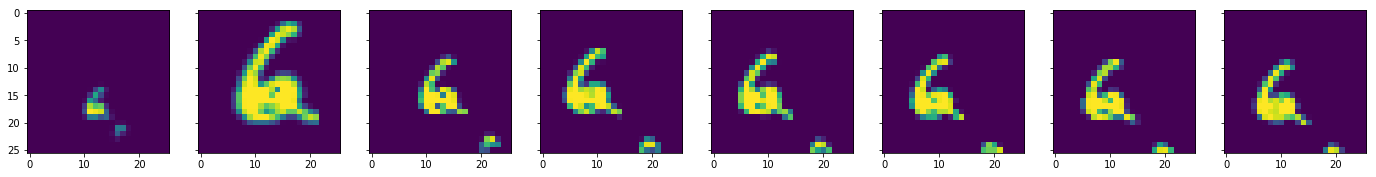

current loc_glimpse:  tensor([ 0.3484, -0.0258,  0.5489, -0.0289,  0.3721, -0.1760])
current loc_glimpse:  tensor([ 0.3911, -0.0255,  0.4755, -0.0308,  0.4084,  0.0305])
current loc_glimpse:  tensor([ 0.4044, -0.0256,  0.4590, -0.0307,  0.4205,  0.0315])
current loc_glimpse:  tensor([ 0.4146, -0.0256,  0.4456, -0.0306,  0.4299,  0.0299])
current loc_glimpse:  tensor([ 0.4233, -0.0257,  0.4331, -0.0306,  0.4377,  0.0279])
current loc_glimpse:  tensor([ 0.4305, -0.0257,  0.4217, -0.0305,  0.4443,  0.0258])


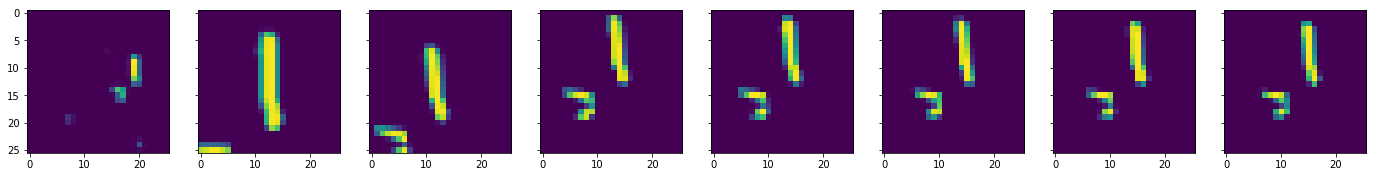

current loc_glimpse:  tensor([ 0.4833, -0.0212, -0.2001, -0.0427,  0.4844,  0.1841])
current loc_glimpse:  tensor([ 0.4577, -0.0225, -0.0828, -0.0349,  0.4637,  0.0870])
current loc_glimpse:  tensor([ 0.4561, -0.0226, -0.0726, -0.0347,  0.4624,  0.0814])
current loc_glimpse:  tensor([ 0.4564, -0.0227, -0.0631, -0.0345,  0.4628,  0.0769])
current loc_glimpse:  tensor([ 0.4575, -0.0228, -0.0537, -0.0344,  0.4639,  0.0729])
current loc_glimpse:  tensor([ 0.4588, -0.0229, -0.0445, -0.0342,  0.4652,  0.0693])


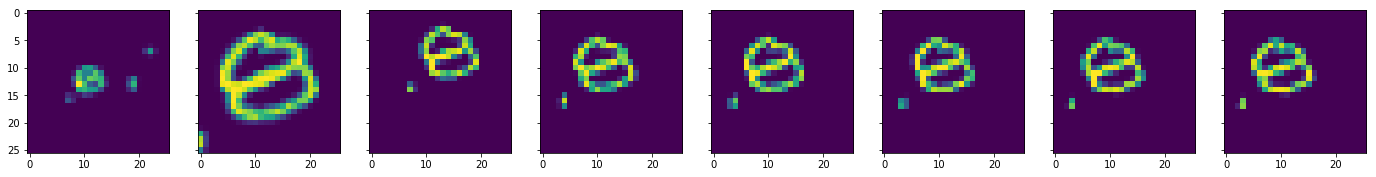

current loc_glimpse:  tensor([ 0.3549, -0.0254,  0.2217, -0.0325,  0.3703, -0.6097])
current loc_glimpse:  tensor([ 0.4382, -0.0254,  0.1189, -0.0286,  0.4481, -0.4104])
current loc_glimpse:  tensor([ 0.4432, -0.0255,  0.1318, -0.0285,  0.4532, -0.3841])
current loc_glimpse:  tensor([ 0.4481, -0.0256,  0.1460, -0.0284,  0.4581, -0.3598])
current loc_glimpse:  tensor([ 0.4531, -0.0257,  0.1593, -0.0283,  0.4632, -0.3368])
current loc_glimpse:  tensor([ 0.4578, -0.0258,  0.1715, -0.0283,  0.4679, -0.3153])


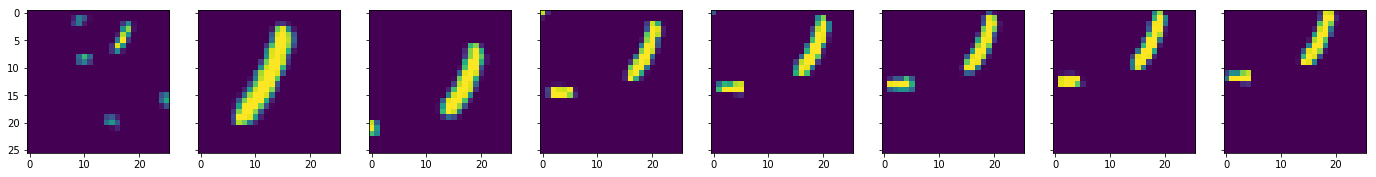

current loc_glimpse:  tensor([ 0.4301, -0.0240, -0.2757, -0.0237,  0.4428, -0.4844])
current loc_glimpse:  tensor([ 0.4126, -0.0233, -0.2241, -0.0283,  0.4226, -0.4792])
current loc_glimpse:  tensor([ 0.4268, -0.0235, -0.1938, -0.0293,  0.4359, -0.4515])
current loc_glimpse:  tensor([ 0.4396, -0.0237, -0.1632, -0.0301,  0.4479, -0.4245])
current loc_glimpse:  tensor([ 0.4487, -0.0239, -0.1333, -0.0306,  0.4564, -0.3966])
current loc_glimpse:  tensor([ 0.4559, -0.0239, -0.1060, -0.0312,  0.4631, -0.3706])


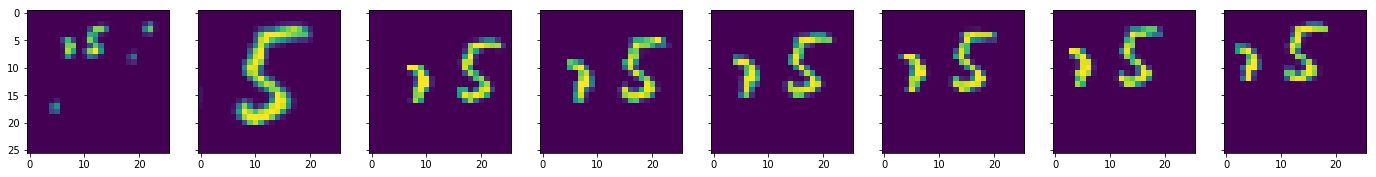

current loc_glimpse:  tensor([ 0.3418, -0.0252,  0.6162, -0.0311,  0.3689, -0.1228])
current loc_glimpse:  tensor([ 0.4629, -0.0266,  0.4184, -0.0313,  0.4761, -0.0365])
current loc_glimpse:  tensor([ 0.4555, -0.0264,  0.4140, -0.0310,  0.4689, -0.0363])
current loc_glimpse:  tensor([ 0.4503, -0.0263,  0.4096, -0.0306,  0.4638, -0.0369])
current loc_glimpse:  tensor([ 0.4478, -0.0262,  0.4043, -0.0304,  0.4612, -0.0367])
current loc_glimpse:  tensor([ 0.4467, -0.0261,  0.3984, -0.0303,  0.4599, -0.0357])


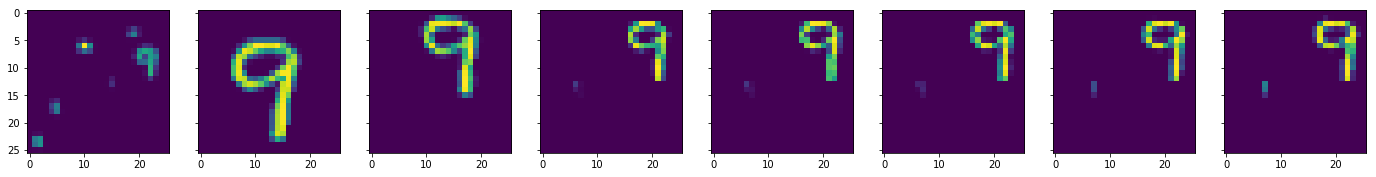

current loc_glimpse:  tensor([ 0.4526, -0.0261,  0.3143, -0.0303,  0.4632, -0.1479])
current loc_glimpse:  tensor([ 0.4172, -0.0250,  0.3308, -0.0303,  0.4300,  0.0211])
current loc_glimpse:  tensor([ 0.4282, -0.0251,  0.3238, -0.0303,  0.4402,  0.0216])
current loc_glimpse:  tensor([ 0.4376, -0.0252,  0.3180, -0.0303,  0.4488,  0.0203])
current loc_glimpse:  tensor([ 0.4451, -0.0252,  0.3122, -0.0303,  0.4558,  0.0188])
current loc_glimpse:  tensor([ 0.4509, -0.0253,  0.3065, -0.0303,  0.4611,  0.0172])


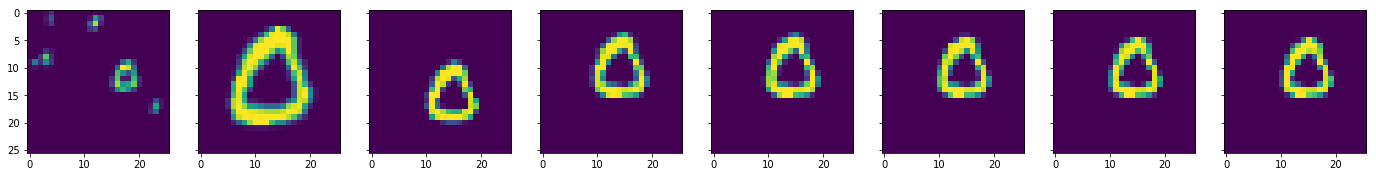

current loc_glimpse:  tensor([ 0.4300, -0.0185, -0.5095, -0.0536,  0.4374,  0.3877])
current loc_glimpse:  tensor([ 0.5361, -0.0213, -0.2675, -0.0423,  0.5331,  0.2397])
current loc_glimpse:  tensor([ 0.5166, -0.0212, -0.2702, -0.0410,  0.5153,  0.2345])
current loc_glimpse:  tensor([ 0.5019, -0.0212, -0.2687, -0.0400,  0.5020,  0.2305])
current loc_glimpse:  tensor([ 0.4920, -0.0212, -0.2638, -0.0393,  0.4929,  0.2250])
current loc_glimpse:  tensor([ 0.4855, -0.0212, -0.2579, -0.0385,  0.4871,  0.2158])


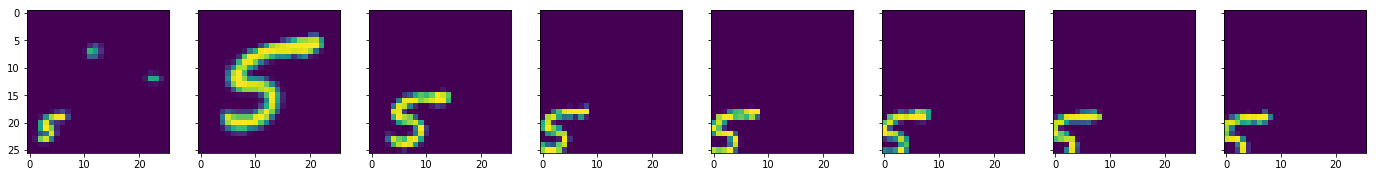

current loc_glimpse:  tensor([ 0.4409, -0.0237,  0.0622, -0.0136,  0.4573,  0.6306])
current loc_glimpse:  tensor([ 0.3957, -0.0235,  0.2525, -0.0270,  0.4106,  0.5398])
current loc_glimpse:  tensor([ 0.4081, -0.0234,  0.2347, -0.0285,  0.4216,  0.5111])
current loc_glimpse:  tensor([ 0.4191, -0.0234,  0.2191, -0.0297,  0.4314,  0.4862])
current loc_glimpse:  tensor([ 0.4295, -0.0234,  0.2054, -0.0309,  0.4406,  0.4629])
current loc_glimpse:  tensor([ 0.4385, -0.0233,  0.1936, -0.0319,  0.4486,  0.4407])


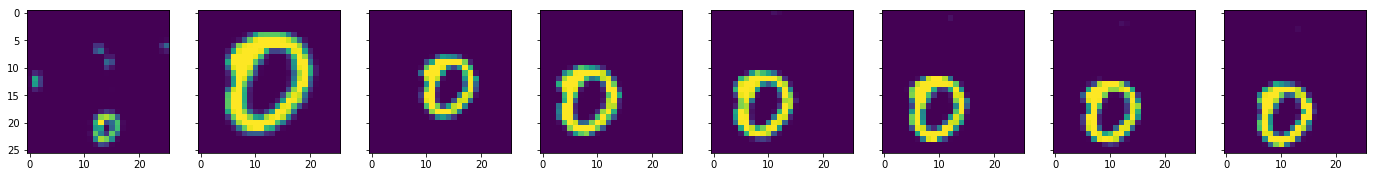

current loc_glimpse:  tensor([ 0.3592, -0.0256,  0.5257, -0.0320,  0.3819, -0.2271])
current loc_glimpse:  tensor([ 0.4510, -0.0263,  0.3879, -0.0304,  0.4645, -0.0799])
current loc_glimpse:  tensor([ 0.4488, -0.0262,  0.3836, -0.0301,  0.4622, -0.0754])
current loc_glimpse:  tensor([ 0.4475, -0.0262,  0.3802, -0.0299,  0.4608, -0.0718])
current loc_glimpse:  tensor([ 0.4473, -0.0261,  0.3761, -0.0299,  0.4604, -0.0678])
current loc_glimpse:  tensor([ 0.4483, -0.0260,  0.3717, -0.0298,  0.4610, -0.0640])


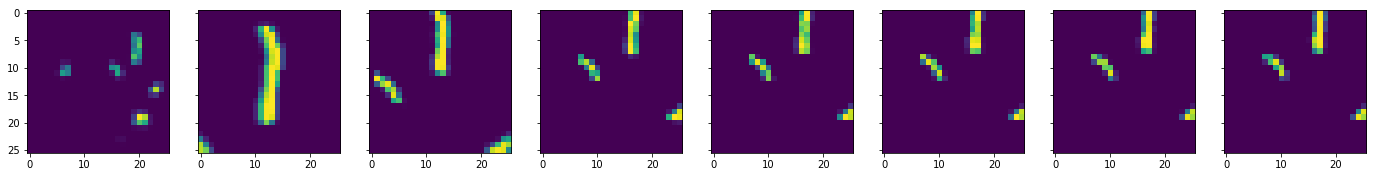

current loc_glimpse:  tensor([ 0.4130, -0.0253,  0.2712, -0.0059,  0.4352,  0.6769])
current loc_glimpse:  tensor([ 0.4032, -0.0243,  0.3674, -0.0237,  0.4192,  0.5269])
current loc_glimpse:  tensor([ 0.4137, -0.0242,  0.3446, -0.0254,  0.4284,  0.5001])
current loc_glimpse:  tensor([ 0.4228, -0.0241,  0.3248, -0.0269,  0.4364,  0.4766])
current loc_glimpse:  tensor([ 0.4304, -0.0240,  0.3061, -0.0283,  0.4430,  0.4534])
current loc_glimpse:  tensor([ 0.4380, -0.0239,  0.2895, -0.0296,  0.4495,  0.4317])


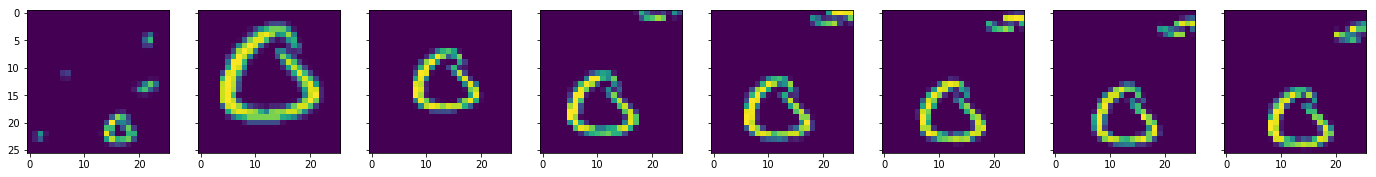

current loc_glimpse:  tensor([ 0.5333, -0.0227, -0.2011, -0.0355,  0.5355,  0.3960])
current loc_glimpse:  tensor([ 0.5731, -0.0236, -0.0669, -0.0358,  0.5706,  0.2785])
current loc_glimpse:  tensor([ 0.5441, -0.0232, -0.0695, -0.0356,  0.5437,  0.2688])
current loc_glimpse:  tensor([ 0.5205, -0.0229, -0.0678, -0.0357,  0.5219,  0.2564])
current loc_glimpse:  tensor([ 0.5026, -0.0227, -0.0658, -0.0356,  0.5053,  0.2388])
current loc_glimpse:  tensor([ 0.4901, -0.0227, -0.0628, -0.0355,  0.4938,  0.2227])


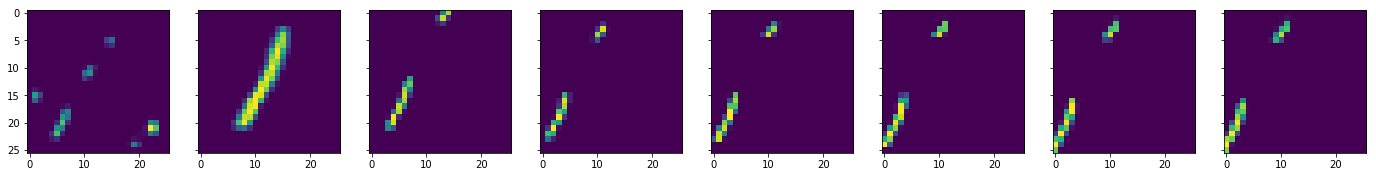

current loc_glimpse:  tensor([ 0.3298, -0.0257,  0.5090, -0.0332,  0.3536, -0.2977])
current loc_glimpse:  tensor([ 0.4578, -0.0264,  0.3408, -0.0298,  0.4705, -0.1491])
current loc_glimpse:  tensor([ 0.4547, -0.0263,  0.3405, -0.0295,  0.4675, -0.1394])
current loc_glimpse:  tensor([ 0.4527, -0.0262,  0.3410, -0.0294,  0.4655, -0.1311])
current loc_glimpse:  tensor([ 0.4526, -0.0262,  0.3407, -0.0293,  0.4652, -0.1230])
current loc_glimpse:  tensor([ 0.4528, -0.0261,  0.3396, -0.0293,  0.4652, -0.1149])


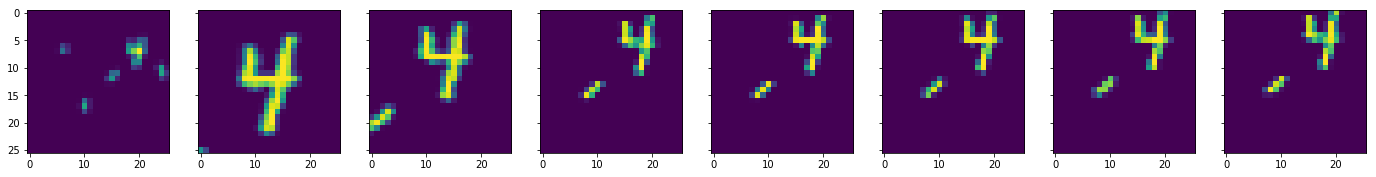

current loc_glimpse:  tensor([ 0.4099, -0.0217, -0.2800, -0.0366,  0.4210, -0.2283])
current loc_glimpse:  tensor([ 0.3794, -0.0221, -0.1949, -0.0331,  0.3910, -0.3285])
current loc_glimpse:  tensor([ 0.4004, -0.0225, -0.1648, -0.0328,  0.4108, -0.3054])
current loc_glimpse:  tensor([ 0.4181, -0.0229, -0.1362, -0.0326,  0.4274, -0.2825])
current loc_glimpse:  tensor([ 0.4317, -0.0232, -0.1099, -0.0324,  0.4402, -0.2607])
current loc_glimpse:  tensor([ 0.4419, -0.0234, -0.0857, -0.0323,  0.4499, -0.2404])


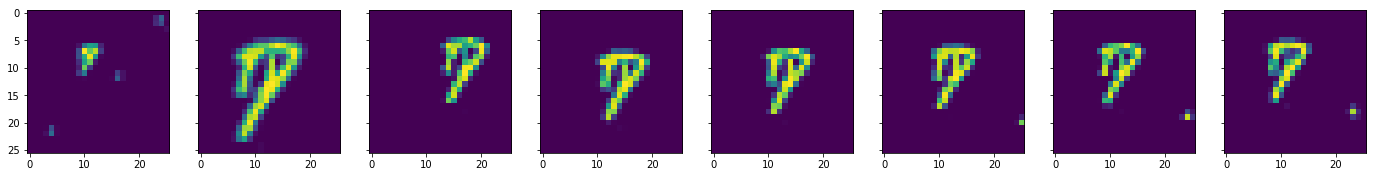

current loc_glimpse:  tensor([ 0.3805, -0.0261,  0.3720, -0.0361,  0.3965, -0.4181])
current loc_glimpse:  tensor([ 0.4907, -0.0265,  0.2410, -0.0289,  0.4999, -0.2443])
current loc_glimpse:  tensor([ 0.4829, -0.0264,  0.2484, -0.0286,  0.4927, -0.2325])
current loc_glimpse:  tensor([ 0.4757, -0.0263,  0.2555, -0.0286,  0.4859, -0.2187])
current loc_glimpse:  tensor([ 0.4710, -0.0262,  0.2615, -0.0286,  0.4815, -0.2047])
current loc_glimpse:  tensor([ 0.4681, -0.0262,  0.2663, -0.0287,  0.4786, -0.1911])


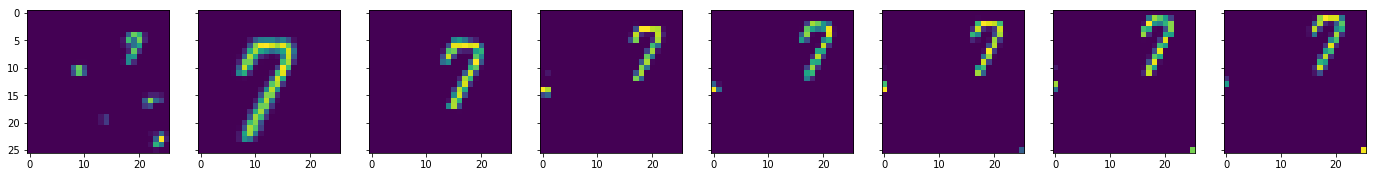

current loc_glimpse:  tensor([ 0.4313, -0.0231,  0.0545, -0.0387,  0.4387,  0.0166])
current loc_glimpse:  tensor([ 0.4130, -0.0234,  0.1480, -0.0328,  0.4243,  0.1066])
current loc_glimpse:  tensor([ 0.4244, -0.0236,  0.1480, -0.0327,  0.4349,  0.1005])
current loc_glimpse:  tensor([ 0.4340, -0.0237,  0.1481, -0.0326,  0.4439,  0.0941])
current loc_glimpse:  tensor([ 0.4419, -0.0239,  0.1483, -0.0325,  0.4512,  0.0880])
current loc_glimpse:  tensor([ 0.4479, -0.0240,  0.1484, -0.0324,  0.4568,  0.0821])


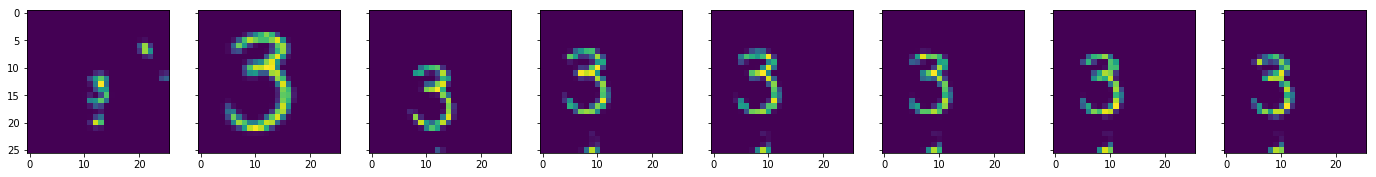

current loc_glimpse:  tensor([ 0.4440, -0.0204, -0.2859, -0.0400,  0.4511,  0.4626])
current loc_glimpse:  tensor([ 0.4168, -0.0205, -0.1895, -0.0381,  0.4242,  0.3162])
current loc_glimpse:  tensor([ 0.4291, -0.0208, -0.1801, -0.0376,  0.4358,  0.2964])
current loc_glimpse:  tensor([ 0.4379, -0.0210, -0.1734, -0.0373,  0.4441,  0.2788])
current loc_glimpse:  tensor([ 0.4444, -0.0212, -0.1660, -0.0370,  0.4503,  0.2614])
current loc_glimpse:  tensor([ 0.4493, -0.0214, -0.1579, -0.0367,  0.4550,  0.2451])


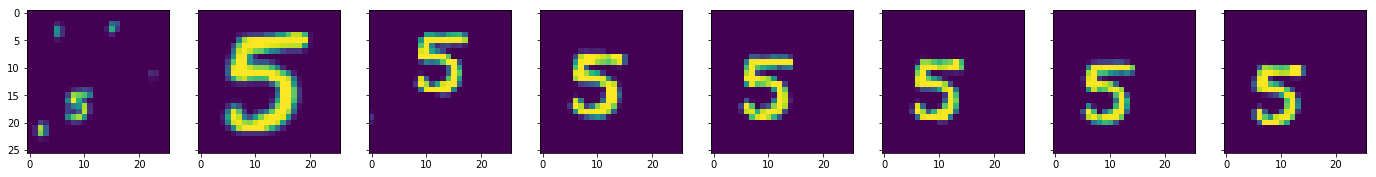

current loc_glimpse:  tensor([ 0.4208, -0.0228, -0.1002, -0.0372,  0.4302, -0.3009])
current loc_glimpse:  tensor([ 0.3931, -0.0232, -0.0487, -0.0317,  0.4050, -0.3007])
current loc_glimpse:  tensor([ 0.4107, -0.0235, -0.0277, -0.0315,  0.4215, -0.2797])
current loc_glimpse:  tensor([ 0.4257, -0.0238, -0.0071, -0.0314,  0.4355, -0.2595])
current loc_glimpse:  tensor([ 0.4373, -0.0240,  0.0119, -0.0313,  0.4464, -0.2401])
current loc_glimpse:  tensor([ 0.4460, -0.0242,  0.0292, -0.0312,  0.4546, -0.2221])


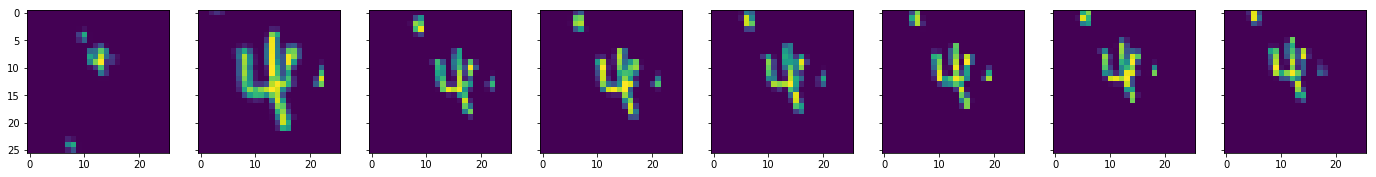

current loc_glimpse:  tensor([ 0.3901, -0.0183, -0.6492, -0.0377,  0.4095,  0.0489])
current loc_glimpse:  tensor([ 0.4843, -0.0215, -0.4344, -0.0340,  0.4891, -0.0644])
current loc_glimpse:  tensor([ 0.4810, -0.0214, -0.4187, -0.0346,  0.4853, -0.0634])
current loc_glimpse:  tensor([ 0.4776, -0.0214, -0.4020, -0.0353,  0.4815, -0.0600])
current loc_glimpse:  tensor([ 0.4767, -0.0214, -0.3842, -0.0358,  0.4802, -0.0557])
current loc_glimpse:  tensor([ 0.4747, -0.0214, -0.3621, -0.0361,  0.4780, -0.0509])


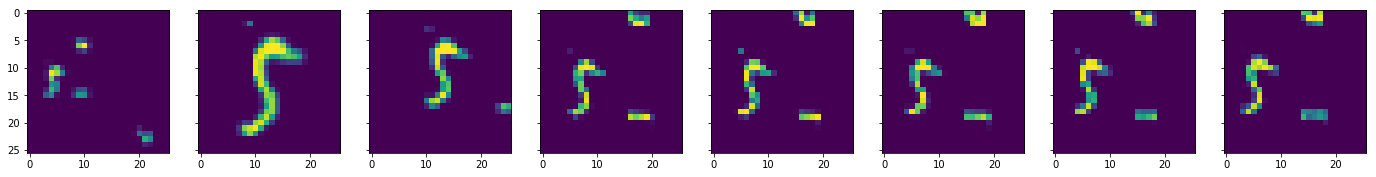

current loc_glimpse:  tensor([ 0.4339, -0.0260,  0.2757, -0.0348,  0.4443, -0.3502])
current loc_glimpse:  tensor([ 0.3984, -0.0248,  0.2246, -0.0296,  0.4122, -0.2075])
current loc_glimpse:  tensor([ 0.4154, -0.0250,  0.2277, -0.0296,  0.4280, -0.1912])
current loc_glimpse:  tensor([ 0.4293, -0.0252,  0.2323, -0.0296,  0.4409, -0.1772])
current loc_glimpse:  tensor([ 0.4401, -0.0253,  0.2364, -0.0296,  0.4510, -0.1643])
current loc_glimpse:  tensor([ 0.4483, -0.0254,  0.2399, -0.0296,  0.4585, -0.1525])


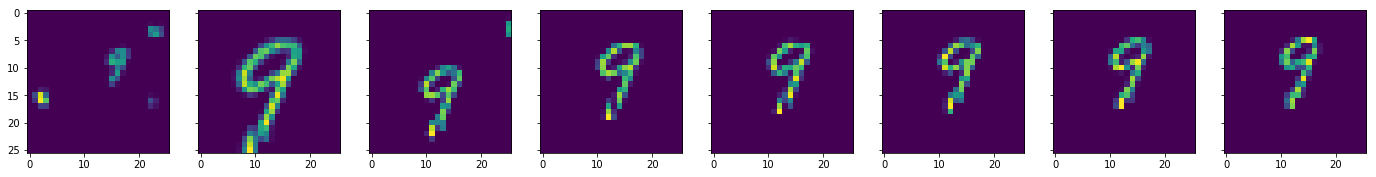

current loc_glimpse:  tensor([ 0.4062, -0.0210, -0.6456, -0.0251,  0.4295, -0.1416])
current loc_glimpse:  tensor([ 0.4050, -0.0214, -0.4943, -0.0274,  0.4179, -0.3055])
current loc_glimpse:  tensor([ 0.4200, -0.0216, -0.4599, -0.0285,  0.4309, -0.2883])
current loc_glimpse:  tensor([ 0.4331, -0.0218, -0.4293, -0.0296,  0.4422, -0.2705])
current loc_glimpse:  tensor([ 0.4436, -0.0219, -0.3999, -0.0306,  0.4511, -0.2528])
current loc_glimpse:  tensor([ 0.4516, -0.0220, -0.3717, -0.0317,  0.4579, -0.2359])


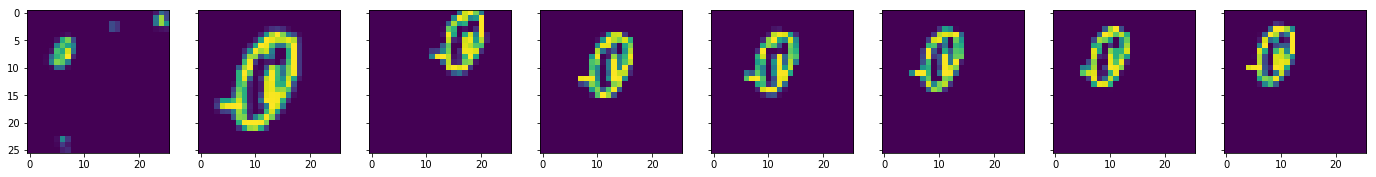

KeyboardInterrupt: ignored

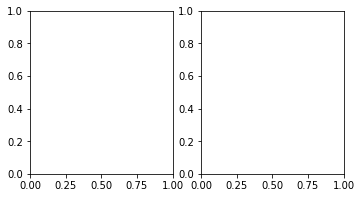

In [0]:
h = 26
w = 26
locations = real_loc_batch_1.view(-1,2,3)
all_grid = F.affine_grid(locations, [128,1,h,w])
all_output_pic = F.grid_sample(feat_batch_1.view(128,1,100,100), all_grid)
for idx_img in range(128):
  fig, axs = plt.subplots(1, 8, figsize=(24,3), sharey=True) # change here 
  real_img = torch.squeeze(feat_batch_1[idx_img],2)
  real_img_reshaped = resize_tensor(real_img, 26, 26)
  real_img_reshaped = torch.squeeze(real_img_reshaped, 0)
  ground_truth_glimpse = all_output_pic[idx_img].reshape(h,w)
  axs[0].imshow(real_img_reshaped)
  axs[1].imshow(ground_truth_glimpse)
  #Using predicted locations
  loc_temp = loc_1_batch[:,idx_img,:] # all six glimpses for one image
  for i in range(6): # change here
    loc_glimpse = loc_temp[i] # get ith glimpse location
    print('current loc_glimpse: ', loc_glimpse)
    loc_glimpse = loc_glimpse.view(-1,2,3)
    grid = F.affine_grid(loc_glimpse, [1,1,w,h])
    output_pic = F.grid_sample(real_img.view(1,1,100,100), grid)
    output_pic = output_pic.reshape(26,26)
    axs[i+2].imshow(output_pic)
  plt.show()
    

In [0]:
x = torch.tensor([[[1,2],[2,3], [5,6]], [[1,2],[2,3], [1,7]]])
print(x.shape)
y = x[:,2,:]
print(y)